<a href="https://colab.research.google.com/github/smd-abdulkareem/CodSoft_Projects_DataScience/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-2

MOVIE RATING PREDECTION USING PYTHON

IMPORT REQURED PACKAGES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import os

def list_files_in_directory(directory):
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            print(os.path.join(dirname, filename))
directory_path = '.'
list_files_in_directory(directory_path)


./.config/default_configs.db
./.config/active_config
./.config/config_sentinel
./.config/.last_survey_prompt.yaml
./.config/.last_opt_in_prompt.yaml
./.config/.last_update_check.json
./.config/gce
./.config/logs/2023.10.03/13.24.45.667379.log
./.config/logs/2023.10.03/13.25.12.399084.log
./.config/logs/2023.10.03/13.25.40.579693.log
./.config/logs/2023.10.03/13.25.30.924211.log
./.config/logs/2023.10.03/13.25.22.293658.log
./.config/logs/2023.10.03/13.25.41.386955.log
./.config/configurations/config_default
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/california_housing_test.csv
./sample_data/california_housing_train.csv
./sample_data/mnist_test.csv
./sample_data/mnist_train_small.csv


LOADING THE DATASET INTO THE PANDAS LIBRARY

In [ ]:
movie=pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [ ]:
movie.shape

(15509, 10)

In [ ]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


FINDING MISSING VALUES

In [ ]:
def missing_values_with_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_with_percent(movie)
result


,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [ ]:
def missing_values_per_row(dataframe):
    # Count missing values in each row and sort in descending order
    sorted_indices = dataframe.isnull().sum(axis=1).sort_values(ascending=False)

    # Create a DataFrame with the counts and sorted indices
    result_df = pd.DataFrame({
        'Missing Values Count': sorted_indices.values
    }, index=sorted_indices.index)

    return result_df

# Call the function with your DataFrame 'movie'
result = missing_values_per_row(movie)
result


,Missing Values Count
1920,9
1836,9
3807,9
8669,9
9600,9
...,...
7385,0
7383,0
7380,0
7377,0


DROP USELESS COLUMNS

In [ ]:
movie.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [ ]:
 movie[movie['Name'] == 'A Ballad of Maladies']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav


In [ ]:
missing_values_with_percent(movie)

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%


In [ ]:
movie.dropna(subset=['Duration'], inplace= True)

In [ ]:
movie = movie[movie.isnull().sum(axis=1).sort_values(ascending=False) <= 5]


<ipython-input-32-d0f85580facd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movie = movie[movie.isnull().sum(axis=1).sort_values(ascending=False) <= 5]


In [ ]:
missing_values_with_percent(movie)

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [ ]:

movie.dropna(subset=['Rating', 'Votes'], inplace=True)
director_description = movie['Director'].describe()
director_counts = movie['Director'].value_counts().sort_values(ascending=False)
movie['Director'].fillna('David Dhawan', inplace=True)
genre_counts = movie['Genre'].value_counts().sort_values(ascending=False)
movie['Genre'].fillna('Drama', inplace=True)
actor1_description = movie['Actor 1'].describe()
movie['Actor 1'].fillna('Amitabh Bachchan', inplace=True)
missing_values_df = pd.DataFrame({
    'Missing Values': movie.isnull().sum(),
    'Percentage': (movie.isnull().sum() / len(movie) * 100).round(2)
})

movie.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [ ]:
missing_values_with_percent(movie)

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor 1,0,0.0%


In [ ]:
movie['Year'] = movie['Year'].str.replace(r'[()]', '', regex=True)
movie['Duration'] = movie['Duration'].str.replace(r' min', '', regex=True)
movie.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


In [ ]:
int_columns = ['Year', 'Duration']
movie[int_columns] = movie[int_columns].astype(int)
movie['Votes'] = movie['Votes'].str.replace(',', '').astype(int)
movie.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 411.4+ KB


VISUALIZING THE DATA

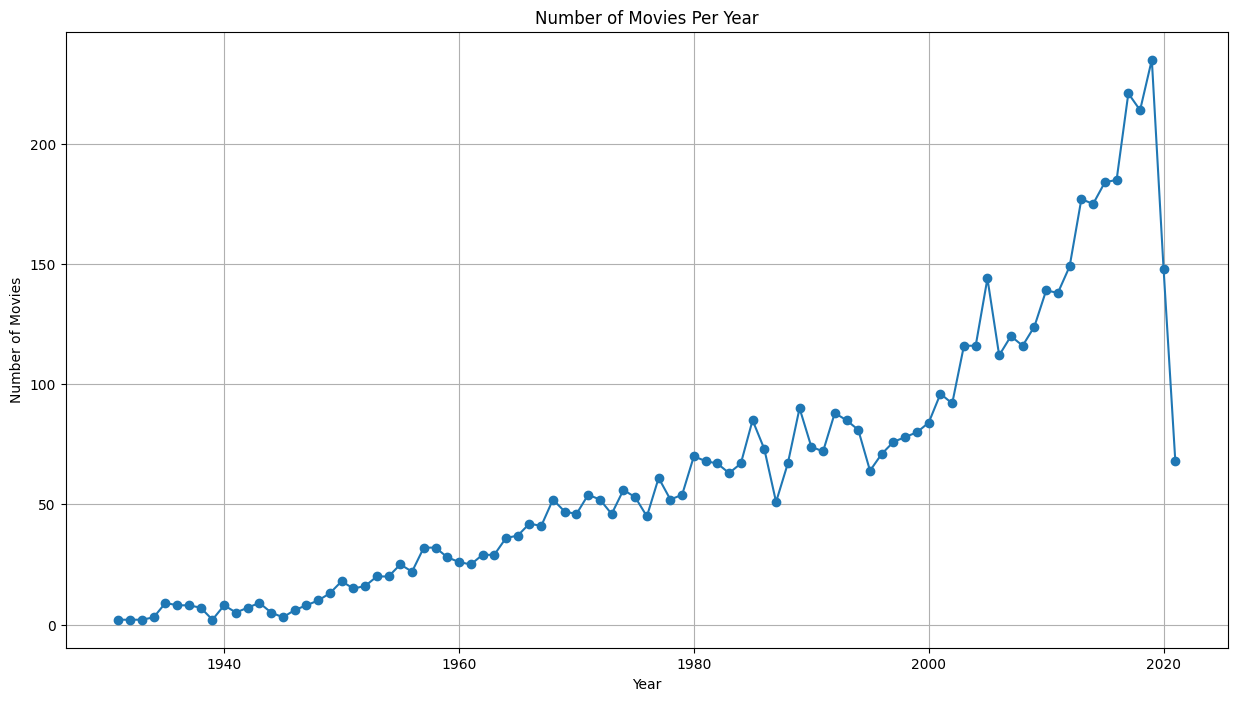

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 8))

year_counts = movie['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.grid(True)

plt.show()


<Axes: >

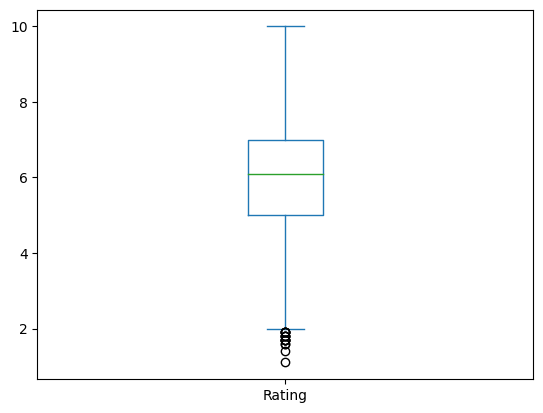

In [ ]:
movie['Rating'].plot(kind='box')

<Axes: >

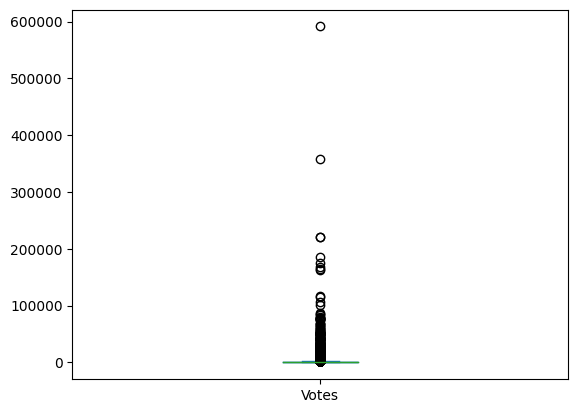

In [ ]:
movie['Votes'].plot(kind='box')

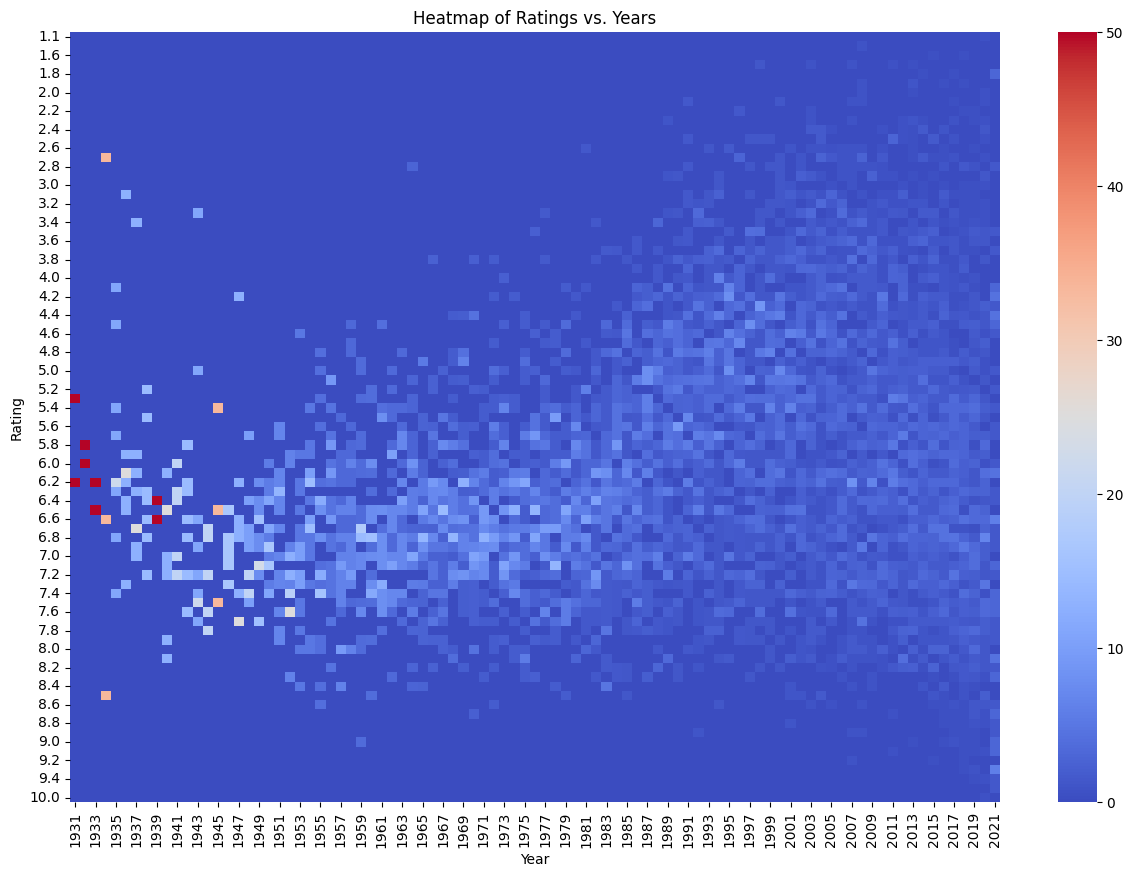

In [ ]:
plt.figure(figsize=(15, 10))

# Create a heatmap with a different colormap ('coolwarm')
sns.heatmap(
    pd.crosstab(movie['Rating'], movie['Year'], normalize='columns') * 100,
    cmap='coolwarm',
)

plt.title('Heatmap of Ratings vs. Years')
plt.xlabel('Year')
plt.ylabel('Rating')

plt.show()


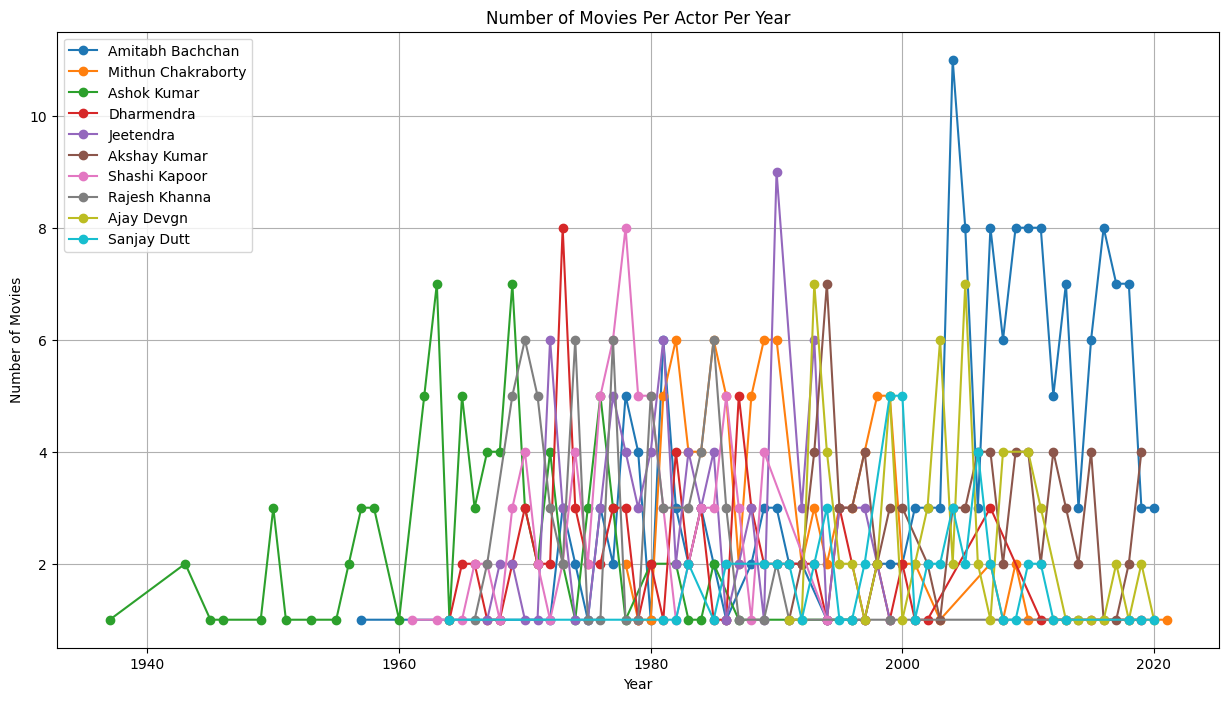

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Replace 'Actor 1' with the column name containing actor names
# Replace 'Year' with the column name containing years
top_actors = movie['Actor 1'].value_counts().head(10).index

for actor in top_actors:
    actor_data = movie[movie['Actor 1'] == actor]
    actor_counts = actor_data['Year'].value_counts().sort_index()
    plt.plot(actor_counts.index, actor_counts.values, marker='o', label=actor)

plt.title('Number of Movies Per Actor Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left')

plt.grid(True)

plt.show()


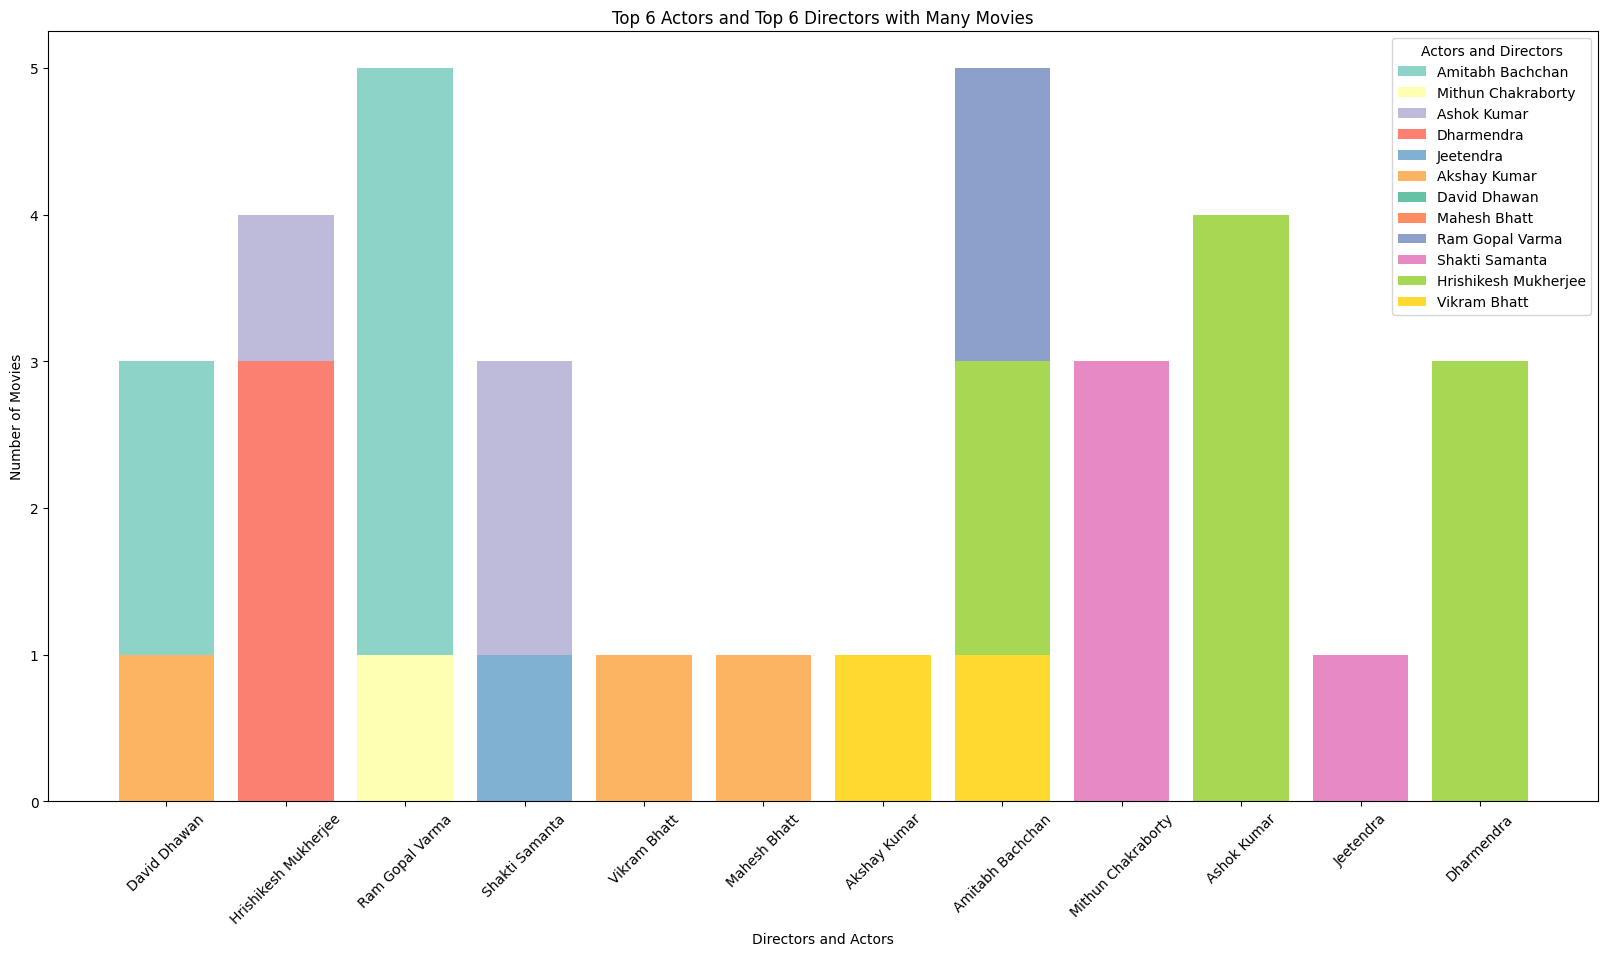

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

# Replace 'df' with 'movie'
top_actors = movie['Actor 1'].value_counts().head(6).index
top_directors = movie['Director'].value_counts().head(6).index

# Initialize a color palette for actors and directors
actor_palette = sns.color_palette('Set3', n_colors=len(top_actors))
director_palette = sns.color_palette('Set2', n_colors=len(top_directors))

# Initialize variables to keep track of the x positions
actor_x_pos = 0
director_x_pos = 0

for actor in top_actors:
    actor_data = movie[movie['Actor 1'] == actor]
    director_counts = actor_data[actor_data['Director'].isin(top_directors)]['Director'].value_counts().sort_index()
    plt.bar(director_counts.index, director_counts.values, label=actor, color=actor_palette[actor_x_pos])
    actor_x_pos += 1

for director in top_directors:
    director_data = movie[movie['Director'] == director]
    actor_counts = director_data[director_data['Actor 1'].isin(top_actors)]['Actor 1'].value_counts().sort_index()
    plt.bar(actor_counts.index, actor_counts.values, label=director, color=director_palette[director_x_pos])
    director_x_pos += 1

plt.title('Top  Actors and Top  Directors with Many Movies')
plt.xlabel('Directors and Actors')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(loc='upper right', title='Actors and Directors')

plt.show()


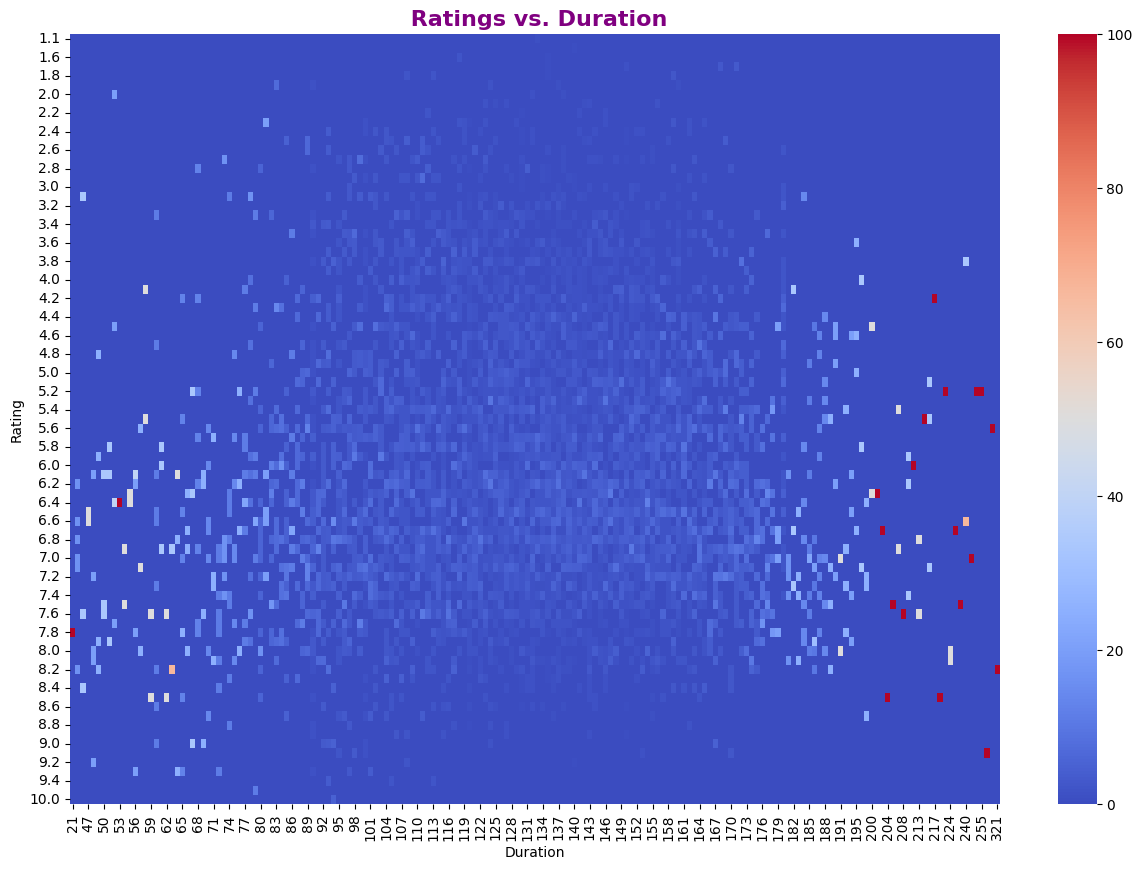

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Create a heatmap with a different colormap ('coolwarm')
heatmap = sns.heatmap(
    pd.crosstab(movie['Rating'], movie['Duration'], normalize='columns') * 100,
    cmap='coolwarm',
)

# Set the title with custom color and fontweight
title = " Ratings vs. Duration"
heatmap.set_title(title, fontsize=16, fontweight='bold', color='purple')

plt.xlabel('Duration')
plt.ylabel('Rating')

plt.show()


DATA MODELING

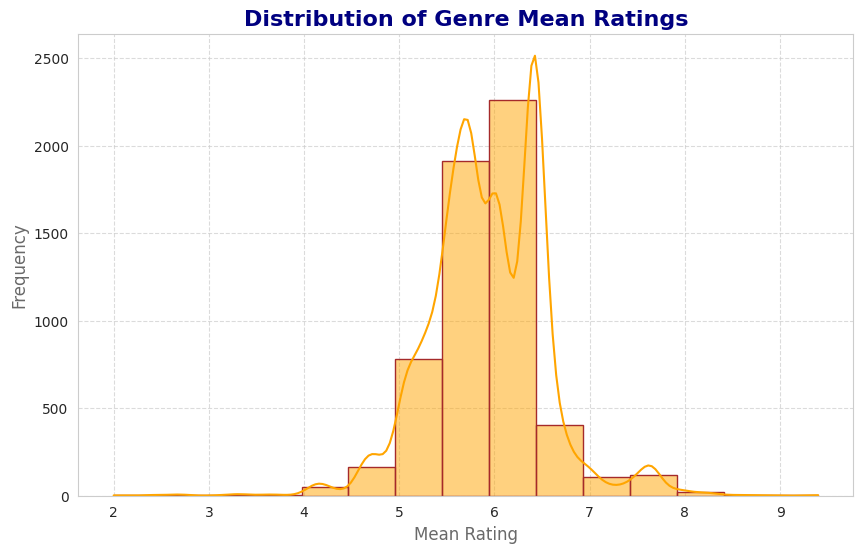

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode 'Genre' based on frequency
genre_counts = movie['Genre'].value_counts()
movie['Genre_encoded'] = movie['Genre'].map(genre_counts)

# Calculate 'Genre_mean_rating' based on the mean rating for each genre
genre_mean_rating = movie.groupby('Genre')['Rating'].transform('mean')
movie['Genre_mean_rating'] = genre_mean_rating

# Create a histogram with custom parameters
plt.figure(figsize=(10, 6))
sns.histplot(
    movie['Genre_mean_rating'],
    bins=15,
    kde=True,
    color='orange',
    edgecolor='brown',  # Add edge color to bars
)

# Customize the plot aesthetics
plt.title('Distribution of Genre Mean Ratings', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mean Rating', fontsize=12, color='dimgray')
plt.ylabel('Frequency', fontsize=12, color='dimgray')

# Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Mean Squared Error: 0.5150
Mean Absolute Error: 0.5126
R2 Score: 0.7232


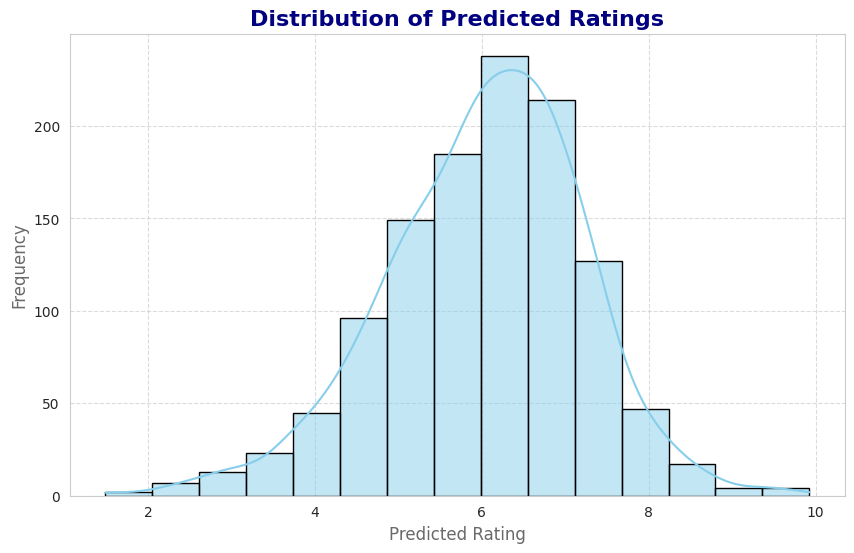

In [ ]:

movie['Director_encoded'] = movie.groupby('Director')['Rating'].transform('mean')
movie['Actor_encoded'] = movie.groupby('Actor 1')['Rating'].transform('mean')

# Define the features and target variable
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = movie[features]
y = movie['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=15, color='skyblue', kde=True, edgecolor='black')

plt.title('Distribution of Predicted Ratings', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Predicted Rating', fontsize=12, color='dimgray')
plt.ylabel('Frequency', fontsize=12, color='dimgray')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()
